In [2]:
#hide
from topological_mott_insulator.unrestricted import *
from topological_mott_insulator.restricted import *
from topological_mott_insulator.utils import *
from matplotlib import pyplot as plt
from matplotlib import transforms
from matplotlib.collections import LineCollection
import matplotlib.colors as colors
import matplotlib as mpl
from scipy.interpolate import interp1d
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import numpy as np

# Welcome to the Topological Mott Insulator toolbox

> A Hartree-Fock library to study an interaction-induced Chern Insulator in the checkerboard lattice.

(under development)

## Install

`to be released`

## How to use

Perform a simple self-consistent algorithm of the unrestricted Hartree-Fock method to compare between site-nematic and quantum anomalous Hall phases

### Site-nematic phase

In [48]:
nx, ny = 12, 12
t0 = -1
jax, jay, jbx, jby = 0.5, -0.5, -0.5, 0.5
v1, v2 = 4., 1.
tau = np.copy(v1/v2)
alpha = ((tau-1)/(8-tau))**(1/6)
kappa = v1*(1+alpha**6)

v3 = kappa*(1/(1+(2*alpha)**6))
v4 = kappa*(1/(1+(np.sqrt(5)*alpha)**6))

cf = (nx*ny)/(nx*ny)
phix, phiy = 0., 0.
beta = 1E+5

un_mf = checkerboard_lattice_un(nx=nx,ny=ny,t0=-1, jax=jax, jay=jay, 
		                        jbx=jbx, jby=jby, v1=v1, v2=v2, v3=v3, v4=v4,
		                        beta=beta, cell_filling=cf, phix=phix, phiy=phiy, cylinder=False, field=0.*1j, induce='nothing', border=False)

for i1 in (range(0,50)):
    un_mf.iterate_mf(eta=0.6)

for i1 in (range(0,50)):
    un_mf.iterate_mf(eta=1.)
    

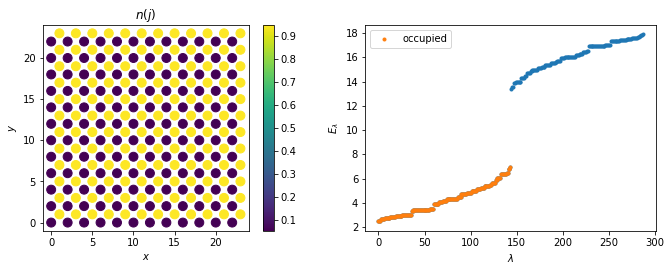

In [51]:
#hide
fig  = plt.figure(figsize=(10, 6/(1.68)))
gs0 = gridspec.GridSpec(1, 2, left=0.1, right=0.99, top=0.85, bottom=0.05, wspace=0.2)

ax = fig.add_subplot(gs0[0])
sc = ax.scatter(un_mf.pos[:,0].flatten(),
                un_mf.pos[:,1].flatten(), c=np.real(un_mf.mfden),  s=80)


ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')
fig.colorbar(sc)
plt.title(r'$n(j)$')
ax2 = fig.add_subplot(gs0[1])
ax2.plot(un_mf.energies,'.')
ax2.plot(un_mf.energies_fermi,'.', label='occupied')
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylabel(r'$E_\lambda$')
ax2.legend()

### Quantum Anomalous Hall phase

In [52]:
nx, ny = 12, 12
t0 = -1
jax, jay, jbx, jby = 0.5, -0.5, -0.5, 0.5
v1, v2 = 4., 2.5
tau = np.copy(v1/v2)
alpha = ((tau-1)/(8-tau))**(1/6)
kappa = v1*(1+alpha**6)

v3 = kappa*(1/(1+(2*alpha)**6))
v4 = kappa*(1/(1+(np.sqrt(5)*alpha)**6))

cf = (nx*ny)/(nx*ny)
phix, phiy = 0., 0.
beta = 1E+5

un_mf = checkerboard_lattice_un(nx=nx,ny=ny,t0=-1, jax=jax, jay=jay, 
		                        jbx=jbx, jby=jby, v1=v1, v2=v2, v3=v3, v4=v4,
		                        beta=beta, cell_filling=cf, phix=phix, phiy=phiy, cylinder=False, field=0.1*1j, induce='nothing', border=False)

for i1 in range(0,50):
    un_mf.iterate_mf(eta=0.6)

for i1 in range(0,50):
    un_mf.iterate_mf(eta=1.)
    
un_mf.field = 0.

for i1 in (range(0,50)):
    un_mf.iterate_mf(eta=0.6)

for i1 in (range(0,50)):
    un_mf.iterate_mf(eta=1.)

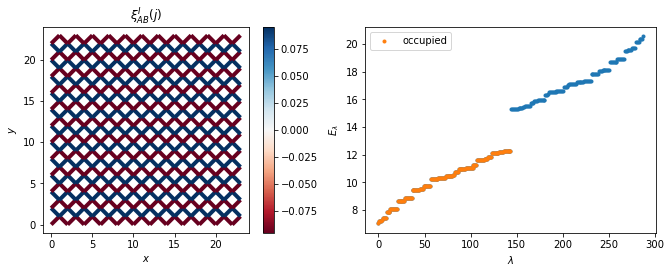

In [53]:
#hide
fig  = plt.figure(figsize=(10, 6/(1.68)))
gs0 = gridspec.GridSpec(1, 2, left=0.1, right=0.99, top=0.85, bottom=0.05, wspace=0.2)

ax = fig.add_subplot(gs0[0])

segment, color, mini, maxi = plot_bonds(un_mf.pos, un_mf.J_nn, np.imag(un_mf.mfhop_nn))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(mini, maxi),
                                linewidths=4, rasterized=True)
 
ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.add_collection(ligne)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(ligne)
ax.set_aspect('equal')
plt.title(r'$\xi_{AB}^I(j)$')

ax2 = fig.add_subplot(gs0[1])
ax2.plot(un_mf.energies,'.')
ax2.plot(un_mf.energies_fermi,'.', label='occupied')
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylabel(r'$E_\lambda$')
plt.legend()

### Self-trapped polaron

For a finite hole/particle doping, the unrestricted Hartree-Fock method gives rise to localized solutions due to the appearance of states inside the gap.

In [54]:
nx, ny = 12, 12
t0 = -1
jax, jay, jbx, jby = 0.5, -0.5, -0.5, 0.5
v1, v2 = 4., 2.5
tau = np.copy(v1/v2)
alpha = ((tau-1)/(8-tau))**(1/6)
kappa = v1*(1+alpha**6)

v3 = kappa*(1/(1+(2*alpha)**6))
v4 = kappa*(1/(1+(np.sqrt(5)*alpha)**6))

cf = (nx*ny+1)/(nx*ny)
phix, phiy = 0., 0.
beta = 1E+5

un_mf = checkerboard_lattice_un(nx=nx,ny=ny,t0=-1, jax=jax, jay=jay, 
		                        jbx=jbx, jby=jby, v1=v1, v2=v2, v3=v3, v4=v4,
		                        beta=beta, cell_filling=cf, phix=phix, phiy=phiy, cylinder=False, field=0.1*1j, induce='nothing', border=False)

for i1 in (range(0,50)):
    un_mf.iterate_mf(eta=0.6)

for i1 in (range(0,50)):
    un_mf.iterate_mf(eta=1.)
    
un_mf.field = 0.

for i1 in (range(0,50)):
    un_mf.iterate_mf(eta=0.6)

for i1 in (range(0,50)):
    un_mf.iterate_mf(eta=1.)

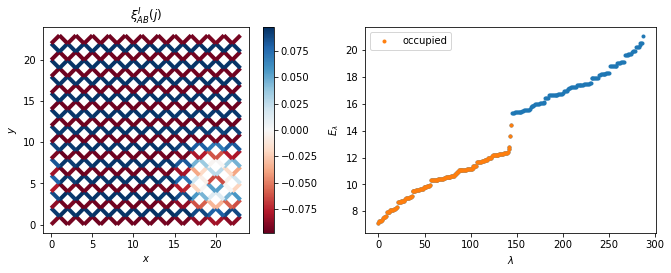

In [55]:
#hide
fig  = plt.figure(figsize=(10, 6/(1.68)))
gs0 = gridspec.GridSpec(1, 2, left=0.1, right=0.99, top=0.85, bottom=0.05, wspace=0.2)

ax = fig.add_subplot(gs0[0])

segment, color, mini, maxi = plot_bonds(un_mf.pos, un_mf.J_nn, np.imag(un_mf.mfhop_nn))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(mini, maxi),
                                linewidths=4, rasterized=True)
 
ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.add_collection(ligne)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(ligne)
ax.set_aspect('equal')
plt.title(r'$\xi_{AB}^I(j)$')

ax2 = fig.add_subplot(gs0[1])
ax2.plot(un_mf.energies,'.')
ax2.plot(un_mf.energies_fermi,'.', label='occupied')
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylabel(r'$E_\lambda$')
plt.legend()

### Topological domains

When increasing the number of particles from half filling, the system eventually generates two domains with opposite spontaneous breaking of the time-reversal symmetry

In [64]:
nx, ny = 24, 24
t0 = -1
jax, jay, jbx, jby = 0.5, -0.5, -0.5, 0.5
v1, v2 = 4., 2.5
tau = np.copy(v1/v2)
alpha = ((tau-1)/(8-tau))**(1/6)
kappa = v1*(1+alpha**6)

v3 = kappa*(1/(1+(2*alpha)**6))
v4 = kappa*(1/(1+(np.sqrt(5)*alpha)**6))

cf = (nx*ny+5)/(nx*ny)
phix, phiy = 0., 0.
beta = 1E+5

un_mf = checkerboard_lattice_un(nx=nx,ny=ny,t0=-1, jax=jax, jay=jay, 
		                        jbx=jbx, jby=jby, v1=v1, v2=v2, v3=v3, v4=v4,
		                        beta=beta, cell_filling=cf, phix=phix, phiy=phiy, cylinder=False, field=0.*1j, induce='nothing', border=False)

for i1 in (range(0,2)):
    un_mf.iterate_mf(eta=0.6)

for i1 in (range(0,2)):
    un_mf.iterate_mf(eta=1.)

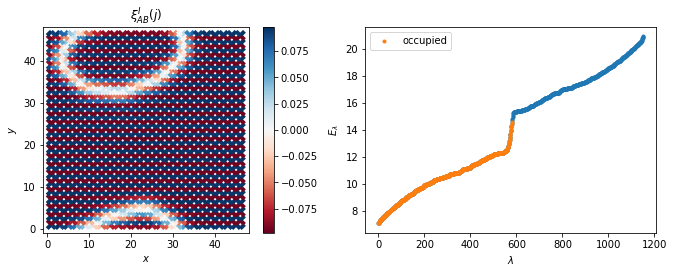

In [62]:
#hide
fig  = plt.figure(figsize=(10, 6/(1.68)))
gs0 = gridspec.GridSpec(1, 2, left=0.1, right=0.99, top=0.85, bottom=0.05, wspace=0.2)

ax = fig.add_subplot(gs0[0])

segment, color, mini, maxi = plot_bonds(un_mf.pos, un_mf.J_nn, np.imag(un_mf.mfhop_nn))
ligne = LineCollection(segment,linestyles='solid',
                                cmap=plt.get_cmap('RdBu'),
                                array=color, norm=plt.Normalize(mini, maxi),
                                linewidths=4, rasterized=True)
 
ax.set_xlim(-1,2*un_mf.nx)
ax.set_ylim(-1,2*un_mf.ny)
ax.add_collection(ligne)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
fig.colorbar(ligne)
ax.set_aspect('equal')
plt.title(r'$\xi_{AB}^I(j)$')

ax2 = fig.add_subplot(gs0[1])
ax2.plot(un_mf.energies,'.')
ax2.plot(un_mf.energies_fermi,'.', label='occupied')
ax2.set_xlabel(r'$\lambda$')
ax2.set_ylabel(r'$E_\lambda$')
plt.legend()